In [114]:
%matplotlib inline
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [115]:
# calculate the education inequality of the 2015 population in US


population = "education_by_gender.csv"
education_attainment = "education_25_and_over.csv"
popu_df = pd.read_csv(population, encoding = "ISO-8859-1")
edu_df= pd.read_csv(education_attainment, encoding = "ISO-8859-1")

In [116]:
popu_df.columns = [c.replace(' ', '_') for c in popu_df.columns]
popu_df.head()

,Geography,__2010_-_Census_-_Both_Sexes__Total,__2010_-_Census_-_Male__Total,__2010_-_Census_-_Female__Total,__2010_-_Estimates_Base_-_Both_Sexes__Total,__2010_-_Estimates_Base_-_Male__Total,__2010_-_Estimates_Base_-_Female__Total,Population_Estimate_-_2010_-_Both_Sexes__Total,Population_Estimate_-_2010_-_Male__Total,Population_Estimate_-_2010_-_Female__Total,...,Population_Estimate_-_2013_-_Female__Median_age_(years),Population_Estimate_-_2014_-_Both_Sexes__Median_age_(years),Population_Estimate_-_2014_-_Male__Median_age_(years),Population_Estimate_-_2014_-_Females__Median_age_(years),Population_Estimate_-_2015_-_Both_Sexes__Median_age_(years),Population_Estimate_-_2015_-_Male__Median_age_(years),Population_Estimate_-_2015_-_Female__Median_age_(years),Population_Estimate_-_2016_-_Both_Sexes__Median_age_(years),Population_Estimate_-_2016_-_Male__Median_age_(years),Population_Estimate_-_2016_-_Female__Median_age_(years)
0,United States,308745538,151781326,156964212,308758105,151788777,156969328,309348193,152088743,157259450,...,38.9,37.7,36.4,39.0,37.8,36.5,39.1,37.9,36.6,39.2
1,Alabama,4779736,2320188,2459548,4780131,2320479,2459652,4785492,2323202,2462290,...,39.8,38.6,37.1,40.0,38.7,37.3,40.2,38.9,37.4,40.3
2,Alaska,710231,369628,340603,710249,369642,340607,714031,371669,342362,...,34.0,33.6,33.2,34.1,33.8,33.4,34.3,33.9,33.5,34.4
3,Arizona,6392017,3175823,3216194,6392301,3176047,3216254,6408312,3184759,3223553,...,38.1,37.1,35.8,38.4,37.3,36.0,38.7,37.6,36.3,38.9
4,Arkansas,2915918,1431637,1484281,2916025,1431688,1484337,2921995,1434797,1487198,...,39.0,37.8,36.4,39.2,37.9,36.6,39.2,38.0,36.7,39.3


In [117]:
popu_df.columns.values.tolist()

['Geography',
 '__2010_-_Census_-_Both_Sexes__Total',
 '__2010_-_Census_-_Male__Total',
 '__2010_-_Census_-_Female__Total',
 '__2010_-_Estimates_Base_-_Both_Sexes__Total',
 '__2010_-_Estimates_Base_-_Male__Total',
 '__2010_-_Estimates_Base_-_Female__Total',
 'Population_Estimate_-_2010_-_Both_Sexes__Total',
 'Population_Estimate_-_2010_-_Male__Total',
 'Population_Estimate_-_2010_-_Female__Total',
 'Population_Estimate_-_2011_-_Both_Sexes__Total',
 'Population_Estimate_-_2011_-_Male__Total',
 'Population_Estimate_-_2011_-_Female__Total',
 'Population_Estimate_-_2012_-_Both_Sexes__Total',
 'Population_Estimate_-_2012_-_Male__Total',
 'Population_Estimate_-_2012_-_Female__Total',
 'Population_Estimate_-_2013_-_Both_Sexes__Total',
 'Population_Estimate_-_2013_-_Male__Total',
 'Population_Estimate_-_2013_-_Female__Total',
 'Population_Estimate_-_2014_-_Both_Sexes__Total',
 'Population_Estimate_-_2014_-_Male__Total',
 'Population_Estimate_-_2014_-_Females__Total',
 'Population_Estimate_-_20

In [118]:
popu_df["Population_Estimate_-_2015_-_Both_Sexes__Total_-_Under_5_years"][0]

19912499

In [119]:
# gini coeffecient value caluclation details can be found here 
# http://documents.worldbank.org/curated/en/361761468761690314/pdf/multi-page.pdf

In [120]:
# Define population scope

# P0 = under 5 years
# P1 = Less than 9th grade = P0 + 5-9 years + 10 - 14 years
# P2 = high school graduate = 17 - 18 years of age = P1 +  15-19 years
# P3 = BA degree = P2 + age 20 - 24
# P4 = graduate or professional degree = total population 
# TotalP = P0 + P1 + P2+ P3+ P4

p0 = popu_df["Population_Estimate_-_2015_-_Both_Sexes__Total_-_Under_5_years"][0]
p1 = p0 + popu_df["Population_Estimate_-_2015_-_Both_Sexes__Total_-_5_to_9_years"][0] + popu_df["Population_Estimate_-_2015_-_Both_Sexes__Total_-_10_to_14_years"][0] 
p2 = p1 + popu_df["Population_Estimate_-_2015_-_Both_Sexes__Total_-_15_to_19_years"][0]
p3 = p2 + popu_df["Population_Estimate_-_2015_-_Both_Sexes__Total_-_20_to_24_years"][0]
p4 = popu_df["Population_Estimate_-_2015_-_Both_Sexes__Total"][0]


p1 

In [121]:
# Define cumulative proportion of population at each level

# Q0 = P0/TotalP
# Q1 = P1 /TotalP
# Q2 = P2 /TotalP
# Q3 = P3 /TotalP
# Q4 = P4 /TotalP



Q0 = float("{0:.4f}".format(p0 / p4))
Q1 = float("{0:.4f}".format(p1 / p4))
Q2 = float("{0:.4f}".format(p2 / p4))
Q3 = float("{0:.4f}".format(p3 / p4))
Q4 = float("{0:.4f}".format(p4 / p4))

In [122]:
# Define average year of education for the subsequent group

y0 = 0 
y1 = 9
y2 = 12
y3 = 16
y4 = 20

In [123]:
# define the average years of schooling
Mu = (Q1*y1)+ (Q2*y2) + (Q3*y3)+ (Q4*y4)

In [124]:
# define cumulative proportion of schooling at each level of schooling

S0 = 0
S1 = float("{0:.4f}".format((Q1*y1) / Muf))
S2 = float("{0:.4f}".format((Q2*y2) / Muf))
S3 = float("{0:.4f}".format((Q3*y3) / Muf))
S4 = float("{0:.4f}".format((Q4*y4) / Muf))

In [125]:
S4

0.6749

In [126]:
# plot scatter plot of 
X = [Q0, Q1, Q2, Q3, Q4]
Y = [S0, S1, S2, S3, S4]

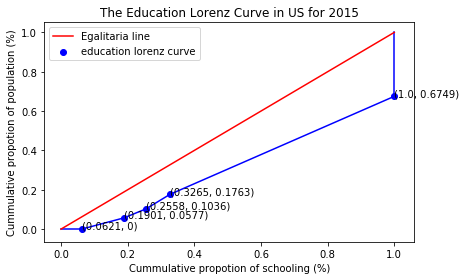

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(X, Y, c='blue', label='education lorenz curve')
plt.plot([0,X[0]], [0,Y[0]], c='blue')
plt.plot([X[0],X[1]], [Y[0],Y[1]], c='blue')
plt.plot([X[1],X[2]], [Y[1],Y[2]], c='blue')
plt.plot([X[2],X[3]], [Y[2],Y[3]], c='blue')
plt.plot([X[3],X[4]], [Y[3],Y[4]], c='blue')
plt.plot([X[4],1], [Y[4],1], c='blue')
plt.plot([0, 1], [0, 1], c='red', label='Egalitaria line')
plt.title('The Education Lorenz Curve in US for 2015')
plt.xlabel('Cummulative propotion of schooling (%)')
plt.ylabel('Cummulative propotion of population (%)')

for xy in zip(X, Y):                                      
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
plt.legend()
plt.tight_layout()
plt.show()

In [128]:
# Define values for female popultation 
# Define population scope

# P0 = under 5 years
# P1 = Less than 9th grade = P0 + 5-9 years + 10 - 14 years
# P2 = high school graduate = 17 - 18 years of age = P1 +  15-19 years
# P3 = BA degree = P2 + age 20 - 24
# P4 = graduate or professional degree = total population 
# TotalP = P0 + P1 + P2+ P3+ P4

pf0 = popu_df["Population_Estimate_-_2015_-_Female__Total_-_Under_5_years"][0]
pf1 = pf0 + popu_df["Population_Estimate_-_2015_-_Female__Total_-_5_to_9_years"][0] + popu_df["Population_Estimate_-_2015_-_Female__Total_-_10_to_14_years"][0] 
pf2 = pf1 + popu_df["Population_Estimate_-_2015_-_Female__Total_-_15_to_19_years"][0]
pf3 = pf2 + popu_df["Population_Estimate_-_2015_-_Female__Total_-_20_to_24_years"][0]
pf4 = popu_df["Population_Estimate_-_2015_-_Female__Total"][0]


In [129]:
# Define cumulative proportion of population at each level

# Q0 = P0/TotalP
# Q1 = P1 /TotalP
# Q2 = P2 /TotalP
# Q3 = P3 /TotalP
# Q4 = P4 /TotalP


Qf0 = float("{0:.4f}".format(pf0 / pf4))
Qf1 = float("{0:.4f}".format(pf1 / pf4))
Qf2 = float("{0:.4f}".format(pf2 / pf4))
Qf3 = float("{0:.4f}".format(pf3 / pf4))
Qf4 = float("{0:.4f}".format(pf4 / pf4))

Qf0

0.0597

In [130]:
# define the average years of schooling
Muf = (Qf1*y1)+ (Qf2*y2) + (Qf3*y3)+ (Qf4*y4)

In [131]:
# define cumulative proportion of schooling at each level of schooling

Sf0 = 0
Sf1 = float("{0:.4f}".format((Qf1*y1) / Muf))
Sf2 = float("{0:.4f}".format((Qf2*y2) / Muf))
Sf3 = float("{0:.4f}".format((Qf3*y3) / Muf))
Sf4 = float("{0:.4f}".format((Qf4*y4) / Muf))

In [132]:
# plot scatter plot of 
Xf = [Qf0, Qf1, Qf2, Qf3, Qf4]
Yf = [Sf0, Sf1, Sf2, Sf3, Sf4]

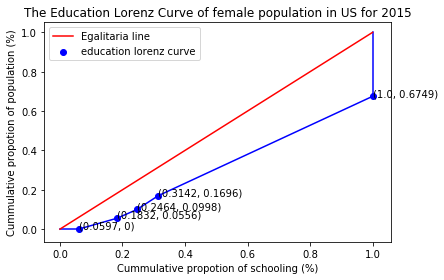

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(Xf, Yf, c='blue', label='education lorenz curve')
plt.plot([0,Xf[0]], [0,Yf[0]], c='blue')
plt.plot([Xf[0],Xf[1]], [Yf[0],Yf[1]], c='blue')
plt.plot([Xf[1],Xf[2]], [Yf[1],Yf[2]], c='blue')
plt.plot([Xf[2],Xf[3]], [Yf[2],Yf[3]], c='blue')
plt.plot([Xf[3],Xf[4]], [Yf[3],Yf[4]], c='blue')
plt.plot([Xf[4],1], [Yf[4],1], c='blue')
plt.plot([0, 1], [0, 1], c='red', label='Egalitaria line')
plt.title('The Education Lorenz Curve of female population in US for 2015')
plt.xlabel('Cummulative propotion of schooling (%)')
plt.ylabel('Cummulative propotion of population (%)')

for xy in zip(Xf, Yf):                                      
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.legend()
plt.tight_layout()
plt.show()

In [134]:
# Define values for male population 

# Define population scope

# P0 = under 5 years
# P1 = Less than 9th grade = P0 + 5-9 years + 10 - 14 years
# P2 = high school graduate = 17 - 18 years of age = P1 +  15-19 years
# P3 = BA degree = P2 + age 20 - 24
# P4 = graduate or professional degree = total population 
# TotalP = P0 + P1 + P2+ P3+ P4

pm0 = popu_df["Population_Estimate_-_2015_-_Male__Total_-_Under_5_years"][0]
pm1 = pm0 + popu_df["Population_Estimate_-_2015_-_Male__Total_-_5_to_9_years"][0] + popu_df["Population_Estimate_-_2015_-_Male__Total_-_10_to_14_years"][0] 
pm2 = pm1 + popu_df["Population_Estimate_-_2015_-_Male__Total_-_15_to_19_years"][0]
pm3 = pm2 + popu_df["Population_Estimate_-_2015_-_Male__Total_-_20_to_24_years"][0]
pm4 = popu_df["Population_Estimate_-_2015_-_Male__Total"][0]




In [135]:
# Define cumulative proportion of population at each level

# Q0 = P0/TotalP
# Q1 = P1 /TotalP
# Q2 = P2 /TotalP
# Q3 = P3 /TotalP
# Q4 = P4 /TotalP


Qm0 = float("{0:.4f}".format(pm0 / pm4))
Qm1 = float("{0:.4f}".format(pm1 / pm4))
Qm2 = float("{0:.4f}".format(pm2 / pm4))
Qm3 = float("{0:.4f}".format(pm3 / pm4))
Qm4 = float("{0:.4f}".format(pm4 / pm4))


In [136]:
# define the average years of schooling
Mum = (Qm1*y1)+ (Qm2*y2) + (Qm3*y3)+ (Qm4*y4)

In [137]:
# define cumulative proportion of schooling at each level of schooling

Sm0 = 0
Sm1 = float("{0:.4f}".format((Qm1*y1) / Mum))
Sm2 = float("{0:.4f}".format((Qm2*y2) / Mum))
Sm3 = float("{0:.4f}".format((Qm3*y3) / Mum))
Sm4 = float("{0:.4f}".format((Qm4*y4) / Mum))

In [138]:
# plot scatter plot of 
Xm = [Qm0, Qm1, Qm2, Qm3, Qm4]
Ym = [Sm0, Sm1, Sm2, Sm3, Sm4]

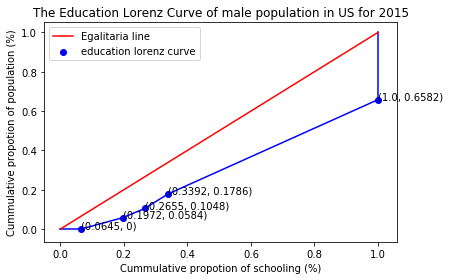

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(Xm, Ym, c='blue', label='education lorenz curve')
plt.plot([0,Xm[0]], [0,Ym[0]], c='blue')
plt.plot([Xm[0],Xm[1]], [Ym[0],Ym[1]], c='blue')
plt.plot([Xm[1],Xm[2]], [Ym[1],Ym[2]], c='blue')
plt.plot([Xm[2],Xm[3]], [Ym[2],Ym[3]], c='blue')
plt.plot([Xm[3],Xm[4]], [Ym[3],Ym[4]], c='blue')
plt.plot([Xm[4],1], [Ym[4],1], c='blue')
plt.plot([0, 1], [0, 1], c='red', label='Egalitaria line')
plt.title('The Education Lorenz Curve of male population in US for 2015')
plt.xlabel('Cummulative propotion of schooling (%)')
plt.ylabel('Cummulative propotion of population (%)')

for xy in zip(Xm, Ym):                                      
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.legend()
plt.tight_layout()
plt.show()